In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman',size=15)

In [2]:
def read(fieldminMaxFile):
    with open(fieldminMaxFile,"r") as fp:
        comment=fp.readline()
        header=fp.readline()
    header=header[1:-1].split()
    indexs_processor=[]
    for i,name in enumerate(header):
        if header[i]=="processor":
            indexs_processor.append(i)
    indexs_processor.reverse()  

    data=pd.read_csv(fieldminMaxFile,comment='#', sep='\t',header=None)
    data=data.drop(indexs_processor,axis=1)
    data.rename(columns=lambda x:header[x],inplace=True)
    return data

## Compare the results of the kinetics-limited mechanism

In [3]:
df_kinetics_RPM=read("./plots/RPM/kineticsLimited/fieldMinMax.dat")
df_kinetics_RPM.head()

,Time,field,min,location(min),max,location(max)
0,1.199999e-08,T,572.7960,(5.000000e-07 5.000000e-07 5.000000e-07),573.0,(1.575000e-04 2.950000e-05 5.000000e-07)
1,2.639996e-08,T,572.7752,(5.000000e-07 5.000000e-07 5.000000e-07),573.0,(1.585000e-04 2.950000e-05 5.000000e-07)
2,4.367991e-08,T,572.7859,(5.000000e-07 5.000000e-07 5.000000e-07),573.0,(3.665000e-04 5.000000e-07 5.000000e-07)
3,6.441582e-08,T,572.8070,(5.000000e-07 5.000000e-07 5.000000e-07),573.0,(3.665000e-04 5.000000e-07 5.000000e-07)
4,8.929890e-08,T,572.8191,(1.500000e-06 7.950000e-05 5.000000e-07),573.0,(3.655000e-04 5.000000e-07 5.000000e-07)


In [4]:
df_kinetics_external=read("./plots/external/kineticsLimited/fieldMinMax.dat")
df_kinetics_external.head()

,Time,field,min,location(min),max,location(max)
0,1.199999e-08,T,572.7960,(5.000000e-07 5.000000e-07 5.000000e-07),573.0,(1.575000e-04 2.950000e-05 5.000000e-07)
1,2.639996e-08,T,572.7752,(5.000000e-07 5.000000e-07 5.000000e-07),573.0,(1.585000e-04 2.950000e-05 5.000000e-07)
2,4.367991e-08,T,572.7859,(5.000000e-07 5.000000e-07 5.000000e-07),573.0,(3.665000e-04 5.000000e-07 5.000000e-07)
3,6.441582e-08,T,572.8070,(5.000000e-07 5.000000e-07 5.000000e-07),573.0,(3.665000e-04 5.000000e-07 5.000000e-07)
4,8.929890e-08,T,572.8191,(1.500000e-06 7.950000e-05 5.000000e-07),573.0,(3.655000e-04 5.000000e-07 5.000000e-07)


In [5]:
Tref=573
TRPM=df_kinetics_RPM.iloc[-1,:]["max"]-Tref
TExternal=df_kinetics_external.iloc[-1,:]["max"]-Tref
print(f"temperature increase by RPM: {TRPM:.2f} K")
print(f"temperature increase by External: {TExternal:.2f} K")
Tdiff=TRPM-TExternal
print(f"combustion temperature difference: {Tdiff:.2f} K")

temperature increase by RPM: 14.21 K
temperature increase by External: 2.07 K
combustion temperature difference: 12.14 K


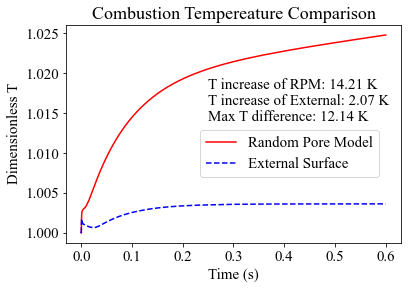

In [10]:

fig, ax = plt.subplots()
ax.plot(df_kinetics_RPM["Time"],df_kinetics_RPM["max"]/Tref,lineStyle="-",color="r",label="Random Pore Model")
ax.plot(df_kinetics_external["Time"],df_kinetics_external["max"]/Tref,lineStyle="--",color="b",label="External Surface")
ax.set_xlabel(f"Time (s)")
ax.set_ylabel(f"Dimensionless T")
ax.set_title(f"Combustion Tempereature Comparison")
ax.text(0.25,1.018,f"T increase of RPM: {TRPM:.2f} K")
ax.text(0.25,1.016,f"T increase of External: {TExternal:.2f} K")
ax.text(0.25,1.014,f"Max T difference: {Tdiff:.2f} K")

ax.legend(loc=[0.4,0.3])


## Compare the results of the convection-limited mechanism

In [11]:
df_convection_RPM=read("./plots/RPM/convectionLimited/fieldMinMax.dat")
df_convection_RPM.head()

,Time,field,min,location(min),max,location(max)
0,1.199999e-08,T,772.3248,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(3.105000e-04 7.350000e-05 5.000000e-07)
1,2.639996e-08,T,772.0785,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(1.995000e-04 2.150000e-05 5.000000e-07)
2,4.367991e-08,T,772.0087,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(3.675000e-04 6.650000e-05 5.000000e-07)
3,6.441582e-08,T,772.0465,(5.000000e-07 1.500000e-06 5.000000e-07),773.0,(3.095000e-04 7.950000e-05 5.000000e-07)
4,8.929890e-08,T,772.1377,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(4.195000e-04 4.850000e-05 5.000000e-07)


In [12]:
df_convection_external=read("./plots/external/convectionLimited/fieldMinMax.dat")
df_convection_external.head()

,Time,field,min,location(min),max,location(max)
0,1.199999e-08,T,772.3248,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(3.105000e-04 7.350000e-05 5.000000e-07)
1,2.639996e-08,T,772.0785,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(1.995000e-04 2.150000e-05 5.000000e-07)
2,4.367991e-08,T,772.0087,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(3.675000e-04 6.650000e-05 5.000000e-07)
3,6.441582e-08,T,772.0465,(5.000000e-07 1.500000e-06 5.000000e-07),773.0,(3.095000e-04 7.950000e-05 5.000000e-07)
4,8.929890e-08,T,772.1377,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(4.195000e-04 4.850000e-05 5.000000e-07)


In [13]:
Tref=773
TRPMC=df_convection_RPM.iloc[-1,:]["max"]-Tref
TExternalC=df_convection_external.iloc[-1,:]["max"]-Tref
print(f"temperature increase by RPM: {TRPMC:.2f} K")
print(f"temperature increase by External: {TExternalC:.2f} K")
TdiffC=TRPMC-TExternalC
print(f"combustion temperature difference: {TdiffC:.2f} K")

temperature increase by RPM: 1033.28 K
temperature increase by External: 1033.09 K
combustion temperature difference: 0.19 K


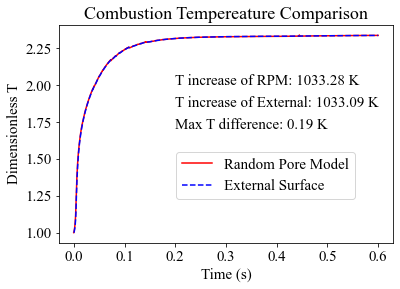

In [18]:
fig, ax = plt.subplots()
ax.plot(df_convection_RPM["Time"][df_convection_RPM.index%1==0],df_convection_RPM["max"][df_convection_RPM.index%1==0]/Tref,lineStyle="-",color="r",label="Random Pore Model")
ax.plot(df_convection_external["Time"][df_convection_external.index%1==0],df_convection_external["max"][df_convection_external.index%1==0]/Tref,lineStyle="--",color="b",label="External Surface")
ax.set_xlabel(f"Time (s)")
ax.set_ylabel(f"Dimensionless T")
ax.set_title(f"Combustion Tempereature Comparison")
ax.text(0.2,2.0,f"T increase of RPM: {TRPMC:.2f} K")
ax.text(0.2,1.85,f"T increase of External: {TExternalC:.2f} K")
ax.text(0.2,1.7,f"Max T difference: {TdiffC:.2f} K")

ax.legend(loc=[0.35,0.2])


## Conclusion

1. not significant for the convection limite regime, but significant for the kinetics-limited ase
2. affact the regime boundary between the kinetics-limited and the competitive regime, and then affact the ignition temperature boundm